In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import os

# Helper function to plot

In [93]:
def plot_graph(axis_title, x, y_train, y_val, xlabel, ylabel, xtick_range, ytick_range, save_path=None):

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

    line1 = ax.plot(x, y_train, color="blue", label="train")
    line2 = ax.plot(x, y_val, color="red", label="val")

    # Nicer visuals.
    ax.set_title(axis_title)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(b=True, which="major", axis="both", color="#d3d3d3", linestyle="-")
    ax.grid(b=True, which="minor", axis="both", color="#e7e7e7", linestyle="dashed")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.set_ticks(np.arange(xtick_range[0], xtick_range[1], xtick_range[2]))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.set_xlim(left=0)
    ax.yaxis.set_ticks(np.arange(ytick_range[0], ytick_range[1], ytick_range[2]))
    ax.yaxis.set_minor_locator(MultipleLocator(0.01))
    ax.patch.set_alpha(0)
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, loc="best")
    
    # Save graph
    plt.tight_layout()
    if save_path:
        plt.savefig(fname=save_path, dpi=300)

# Batch-size = 64

In [2]:
df_64 = pd.read_csv("../results/fit/20201203_040325___INSTANCE/csv_logger/csv_logger.csv")

In [67]:
df_64.head()

,epoch,accuracy,iouMetric,loss,val_accuracy,val_iouMetric,val_loss
0,0,0.978508,0.001970,0.108690,0.994346,0.001353,0.051830
1,1,0.995164,0.001077,0.043740,0.995700,0.000907,0.038866
2,2,0.995743,0.000983,0.038027,0.995906,0.001044,0.035970
3,3,0.995874,0.001284,0.035558,0.995997,0.001618,0.033623
4,4,0.995947,0.001986,0.032917,0.996051,0.002598,0.030740


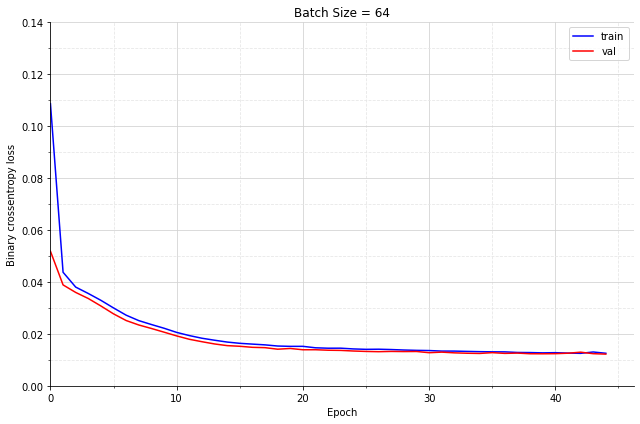

In [96]:
plot_graph(axis_title="Batch Size = 64",
           x=df_64["epoch"],
           y_train=df_64["loss"],
           y_val=df_64["val_loss"],
           xlabel="Epoch",
           ylabel="Binary crossentropy loss",
           xtick_range=(0, 50, 10),
           ytick_range=(0, 0.16, 0.02),
           save_path="../results/fit/20201203_040325___INSTANCE/csv_logger/loss.png")

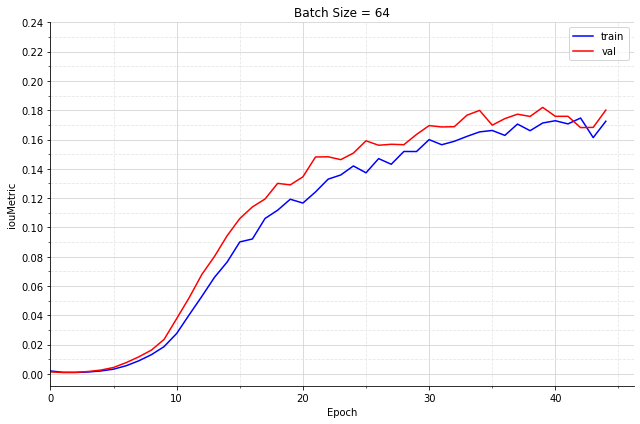

In [97]:
plot_graph(axis_title="Batch Size = 64",
           x=df_64["epoch"],
           y_train=df_64["iouMetric"],
           y_val=df_64["val_iouMetric"],
           xlabel="Epoch",
           ylabel="iouMetric",
           xtick_range=(0, 50, 10),
           ytick_range=(0, 0.26, 0.02),
           save_path="../results/fit/20201203_040325___INSTANCE/csv_logger/iouMetric.png")

# Batch-size = 10

In [68]:
df_10 = pd.read_csv("../results/fit/20201203_013807___INSTANCE/csv_logger/csv_logger.csv")

In [75]:
df_10.head()

,epoch,accuracy,iouMetric,loss,val_accuracy,val_iouMetric,val_loss
0,0,0.993026,0.001689,0.047411,0.996097,0.003997,0.028094
1,1,0.995955,0.013074,0.023891,0.995940,0.029175,0.019745
2,2,0.995757,0.048173,0.018577,0.995383,0.077297,0.016643
3,3,0.995762,0.089770,0.016091,0.995984,0.100403,0.014609
4,4,0.995952,0.113705,0.014901,0.996018,0.122980,0.013904


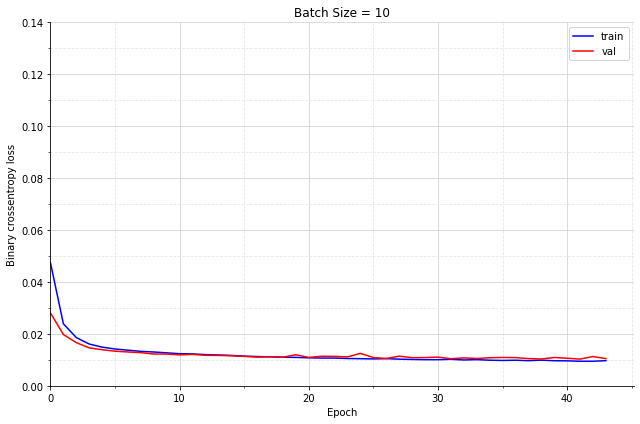

In [98]:
plot_graph(axis_title="Batch Size = 10",
           x=df_10["epoch"],
           y_train=df_10["loss"],
           y_val=df_10["val_loss"],
           xlabel="Epoch",
           ylabel="Binary crossentropy loss",
           xtick_range=(0, 50, 10),
           ytick_range=(0, 0.16, 0.02),
           save_path="../results/fit/20201203_013807___INSTANCE/csv_logger/loss.png")

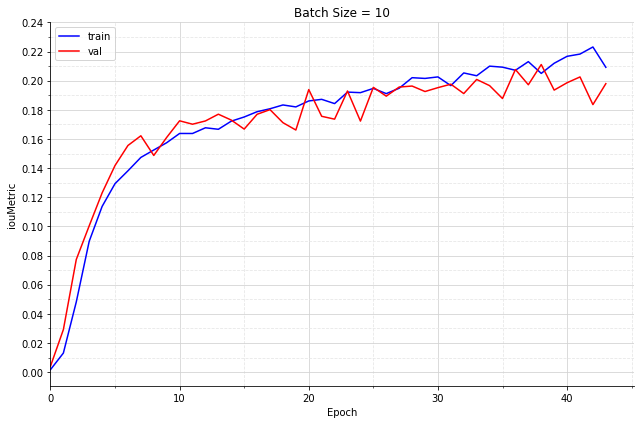

In [99]:
plot_graph(axis_title="Batch Size = 10",
           x=df_10["epoch"],
           y_train=df_10["iouMetric"],
           y_val=df_10["val_iouMetric"],
           xlabel="Epoch",
           ylabel="iouMetric",
           xtick_range=(0, 50, 10),
           ytick_range=(0, 0.26, 0.02),
           save_path="../results/fit/20201203_013807___INSTANCE/csv_logger/iouMetric.png")

---

# Combine .csv

In [181]:
mass_train_df = pd.read_csv("../data/raw_data/csv-description-updated/Mass-Training-Description-UPDATED.csv")
mass_test_df = pd.read_csv("../data/raw_data/csv-description-updated/Mass-Test-Description-UPDATED.csv")

mass_df = pd.concat([mass_train_df, mass_test_df])

mass_df

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,full_path,crop_path,mask_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,P_01825,2,RIGHT,MLO,1,mass,LOBULATED,MICROLOBULATED,3,BENIGN_WITHOUT_CALLBACK,3,Mass-Test_P_01825_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Mass-Test_P_01825_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_01825_RIGHT_MLO_1/1.3.6.1.4.1.9590...,../data/raw_data/Mass/Test/Mass-Test_P_01825_R...,../data/raw_data/Mass/Test/Mass-Test_P_01825_R...,../data/raw_data/Mass/Test/Mass-Test_P_01825_R...
374,P_01833,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,5,MALIGNANT,5,Mass-Test_P_01833_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Mass-Test_P_01833_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_01833_RIGHT_MLO_1/1.3.6.1.4.1.9590...,../data/raw_data/Mass/Test/Mass-Test_P_01833_R...,../data/raw_data/Mass/Test/Mass-Test_P_01833_R...,../data/raw_data/Mass/Test/Mass-Test_P_01833_R...
375,P_01865,2,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED,4,MALIGNANT,2,Mass-Test_P_01865_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_01865_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_01865_LEFT_MLO_1/1.3.6.1.4.1.9590....,../data/raw_data/Mass/Test/Mass-Test_P_01865_L...,../data/raw_data/Mass/Test/Mass-Test_P_01865_L...,../data/raw_data/Mass/Test/Mass-Test_P_01865_L...
376,P_01912,3,RIGHT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,4,Mass-Test_P_01912_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_01912_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_01912_RIGHT_CC_1/1.3.6.1.4.1.9590....,../data/raw_data/Mass/Test/Mass-Test_P_01912_R...,../data/raw_data/Mass/Test/Mass-Test_P_01912_R...,../data/raw_data/Mass/Test/Mass-Test_P_01912_R...


In [183]:
# Create identifier column.
mass_df.insert(loc=0, column="identifier", value=np.nan)
mass_df["identifier"] = mass_df.apply(lambda x: "_".join([x["patient_id"], x["left_or_right_breast"], x["image_view"]]), axis=1)

# Drop filepath columns, they are useless because the filepaths always change.
mass_df.drop(["image_file_path", "cropped_image_file_path", "ROI_mask_file_path", "full_path", "mask_path", "crop_path"], axis=1, inplace=True)

# Sort by identifier column.
mass_df.sort_values(by=["identifier"])

,identifier,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety
0,P_00001_LEFT_CC,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
1,P_00001_LEFT_MLO,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
2,P_00004_LEFT_CC,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
3,P_00004_LEFT_MLO,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
4,P_00004_RIGHT_MLO,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033_RIGHT_MLO,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4
1314,P_02079_RIGHT_CC,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5
1315,P_02079_RIGHT_MLO,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5
1316,P_02092_LEFT_CC,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2


In [184]:
mass_df.to_csv("../data/csv/Mass_all.csv", index=False)

In [175]:
# Get list of test and train image identifiers.
train_identifiers = []
test_identifiers = []

train_path = "../data/preprocessed/Mass/Train_FULL"
test_path = "../data/preprocessed/Mass/Test_FULL"

# Train images.
for curdir, dirs, files in os.walk(train_path):
    
    files.sort()
    
    for f in files:
        if f.endswith(".png"):
            f = f.replace("_FULL___PRE.png", "")
            train_identifiers.append(f)
            
# Test images.
for curdir, dirs, files in os.walk(test_path):
    
    files.sort()
    
    for f in files:
        if f.endswith(".png"):
            f = f.replace("_FULL___PRE.png", "")
            test_identifiers.append(f)
            
print(len(train_identifiers))
print(train_identifiers[:5])
print(len(test_identifiers))
print(test_identifiers[:5])

# Create dataframe for train images.
mass_train_df_new = mass_df[mass_df["identifier"].isin(train_identifiers)]

# Create dataframe for test images.
mass_test_df_new = mass_df[mass_df["identifier"].isin(test_identifiers)]

1433
['P_00001_LEFT_CC', 'P_00004_LEFT_CC', 'P_00004_LEFT_MLO', 'P_00009_RIGHT_CC', 'P_00009_RIGHT_MLO']
159
['P_00001_LEFT_MLO', 'P_00004_RIGHT_MLO', 'P_00018_RIGHT_CC', 'P_00021_RIGHT_CC', 'P_00023_RIGHT_CC']


In [176]:
print(mass_train_df_new.shape)
print(mass_test_df_new.shape)

(1528, 12)
(168, 12)


In [177]:
mass_train_df_new.to_csv("../data/csv/Mass_train.csv", index=False)
mass_test_df_new.to_csv("../data/csv/Mass_test.csv", index=False)